In [1]:
import mtest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GM0 = 1.45e9
KM0 = 3.44e9
tmax = 15
tload = 0.5
K = 3.61e6
alpha_y = 0.28
alpha_g = 0.25

In [3]:
m = mtest.MTest()
mtest.setVerboseMode(mtest.VerboseLevel.VERBOSE_QUIET)
m.setMaximumNumberOfSubSteps(10)
m.setBehaviour("generic", "src/libBehaviour.so", "DruckerPrager")
m.setExternalStateVariable("Temperature", 293.15)
m.setImposedStress("SXX", 0)
m.setImposedStress("SYY", 0)
m.setImposedStrain("EZZ", {0: 0, tload: -2.e-2})

In [4]:
m.setMaterialProperty("Cohesion", K)
m.setMaterialProperty("FrictionParameter", alpha_y)
m.setMaterialProperty("DilatancyParameter", alpha_g)
m.setMaterialProperty(
    "YoungModulus", (9 * GM0 * KM0) / (3 * KM0 + GM0)
)  
m.setMaterialProperty(
    "PoissonRatio", (3 * KM0 - 2 * GM0) / (2 * GM0 + 6 * KM0)
)

In [5]:
ltime = np.append(np.linspace(0, tload, 50), np.linspace(tload*51/50, tmax, 20))
ltime

array([0.00000000e+00, 1.02040816e-02, 2.04081633e-02, 3.06122449e-02,
       4.08163265e-02, 5.10204082e-02, 6.12244898e-02, 7.14285714e-02,
       8.16326531e-02, 9.18367347e-02, 1.02040816e-01, 1.12244898e-01,
       1.22448980e-01, 1.32653061e-01, 1.42857143e-01, 1.53061224e-01,
       1.63265306e-01, 1.73469388e-01, 1.83673469e-01, 1.93877551e-01,
       2.04081633e-01, 2.14285714e-01, 2.24489796e-01, 2.34693878e-01,
       2.44897959e-01, 2.55102041e-01, 2.65306122e-01, 2.75510204e-01,
       2.85714286e-01, 2.95918367e-01, 3.06122449e-01, 3.16326531e-01,
       3.26530612e-01, 3.36734694e-01, 3.46938776e-01, 3.57142857e-01,
       3.67346939e-01, 3.77551020e-01, 3.87755102e-01, 3.97959184e-01,
       4.08163265e-01, 4.18367347e-01, 4.28571429e-01, 4.38775510e-01,
       4.48979592e-01, 4.59183673e-01, 4.69387755e-01, 4.79591837e-01,
       4.89795918e-01, 5.00000000e-01, 5.10000000e-01, 1.27263158e+00,
       2.03526316e+00, 2.79789474e+00, 3.56052632e+00, 4.32315789e+00,
      

In [6]:
s = mtest.MTestCurrentState()
wk = mtest.MTestWorkSpace()
m.completeInitialisation()
m.initializeCurrentState(s)
m.initializeWorkSpace(wk)

numerical1 = np.array([0.0])
numerical2 = np.array([0.0])

In [7]:
# run sim
for i in range(0,len(ltime) - 1):
    print('time', i)
    m.execute(s, wk, ltime[i], ltime[i + 1])
    numerical1 = np.append(
        numerical1, s.s1[2] 
    ) 
    numerical2 = np.append(
        numerical2, s.e1[2] 
    )
    # Kelvin mapping backwards!

time 0
time 1
time 2
time 3
time 4
time 5
time 6
time 7
time 8
time 9
time 10
time 11
time 12
time 13
time 14
time 15
time 16
time 17
time 18
time 19
time 20
time 21
time 22
time 23
time 24
time 25
time 26
time 27
time 28
time 29
time 30
time 31
time 32
time 33
time 34
time 35
time 36
time 37
time 38
time 39
time 40
time 41
time 42
time 43
time 44
time 45
time 46
time 47
time 48
time 49
time 50
time 51
time 52
time 53
time 54
time 55
time 56
time 57
time 58
time 59
time 60
time 61
time 62
time 63
time 64
time 65
time 66
time 67
time 68


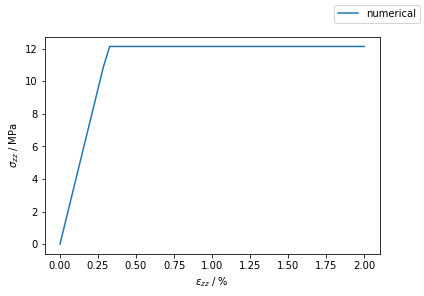

In [8]:
#%matplotlib notebook
fig, ax = plt.subplots()
#ax.plot(ltime, numerical * 100.0, label="numerical")
ax.plot(-numerical2*100, -numerical1 /1000000.0, label="numerical")
ax.set_ylabel("$\\sigma_{zz}$ / MPa")
ax.set_xlabel("$\\epsilon_{zz}$ / %")
fig.legend()
fig.savefig("DP_mfront.pdf")

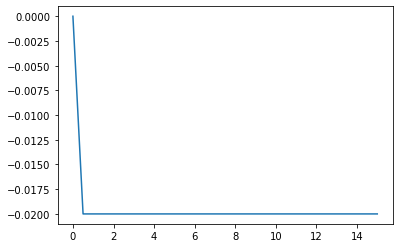

In [9]:
plt.plot(ltime,numerical2)
plt.show()

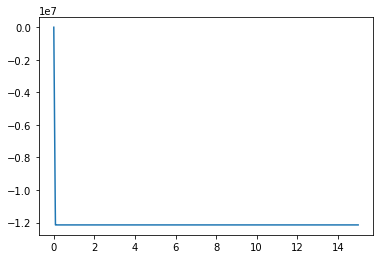

In [10]:
plt.plot(ltime,numerical1)